# Ali Rostami 610302040
## series 4 of ML Training
### Question 3

## imports
در بخش اول این برنامه لایبرری‌ها و چیزهایی که لازم است از خارج از برنامه وارد شوند را قرار می‌دهیم

in this section we will import every library and outsider codes that we want to use later

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


## variables
در این بخش متغییرهای پرتکرار را تعریف کرده‌ایم تا در صورت نیاز برای تغییر در بخش‌های مختلف تنها نیاز باشد این بخش را تغییر دهیم

in this part we are going to define our variables so if we need to change anything in our program only change them from here.


In [2]:
cancer = load_breast_cancer()

X_data, y_data = cancer.data, cancer.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
n_splits= 5
n_repeats= 10
random_state= 42
components = [20, 15, 10, 5, 4, 3, 2]
all_accuracies = {}


perceptron = Perceptron()
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

## cross-validation
تابع محاسبه کننده کراس ولیدیشن که نتایج را برای داده آموزشی و تست به ما برمیگرداند

در ادامه میتوانیم این تابع را برای حالات مختلف صدا کنیم و نتایج مورد نیاز را به‌دست آوریم

Function to perform cross-validation and return train and test accuracies

so we can call it later and calculate everything

In [3]:
def cross_validate_model(X, y, model, cv):
    train_accuracies = []
    test_accuracies = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_accuracies.append(train_accuracy)
        
        y_test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies

## PCA Models
در این بخش من مدل‌های مختلف برای پی سی ای را فیت کرده‌ام و همه را نگه داشته‌ام

in this section I fitted a PCA Model for every components and saved them

In [4]:
pca_models = [PCA(n_components=c).fit(X_scaled) for c in components]
X_pca = [pca.transform(X_scaled) for pca in pca_models]

## accuracies
در این بخش دقت مدل‌های مختلف را با با کمک کراس ولیدیشن محاسبه کرده‌ام و آماده رسم نمودار جعبه‌ای شده‌است

in this section I calculated accuracies for all results of last section and we are ready for drawing box plots

In [5]:
for X_pc, comp in zip(X_pca, components):
    train_acc, test_acc = cross_validate_model(X_pc, y_data, perceptron, cv)
    all_accuracies[comp] = {"train": train_acc, "test": test_acc}

for comp in components:
    print(f"PCA Components: {comp}")
    print(f"  Train Accuracy: {np.mean(all_accuracies[comp]['train']):.4f}")
    print(f"  Test Accuracy: {np.mean(all_accuracies[comp]['test']):.4f}\n")


PCA Components: 20
  Train Accuracy: 0.9738
  Test Accuracy: 0.9617

PCA Components: 15
  Train Accuracy: 0.9735
  Test Accuracy: 0.9617

PCA Components: 10
  Train Accuracy: 0.9714
  Test Accuracy: 0.9670

PCA Components: 5
  Train Accuracy: 0.9652
  Test Accuracy: 0.9605

PCA Components: 4
  Train Accuracy: 0.9502
  Test Accuracy: 0.9476

PCA Components: 3
  Train Accuracy: 0.9358
  Test Accuracy: 0.9313

PCA Components: 2
  Train Accuracy: 0.9336
  Test Accuracy: 0.9345



## results
در نهایت میتوانید نمودارهای مختلف را ببینید ۲ مساله برای ما مهم است یکی بالا بودن دقت دو کاهش تعداد فیچرها که با توجه به ترکیب این دو مورد به نظر میرسد کاهش به ۱۰ میتواند برای ما مناسب‌ترین باشد ولی به طور کلی مدل‌های ما برای حل این مساله به طور کلی خوب هستند

finally we can see all the box plots now we have 2 concerns about choosing the best one first is lower accuracies and second one is reducing features so by these two we can confirm that 10 components will work great for us but all models are ok for this problem.

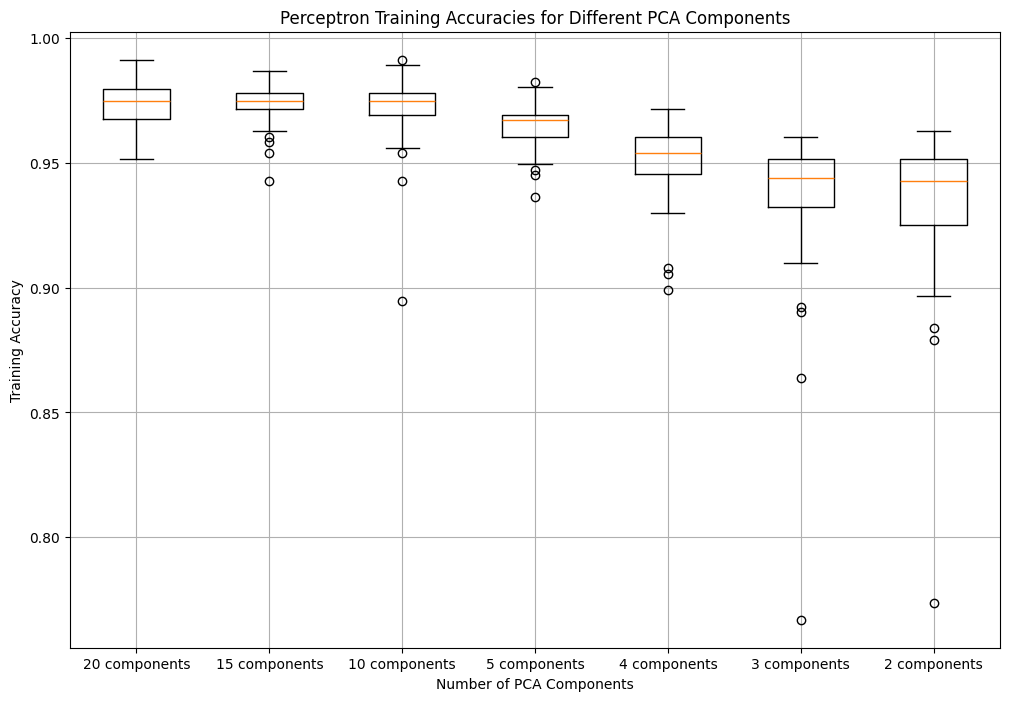

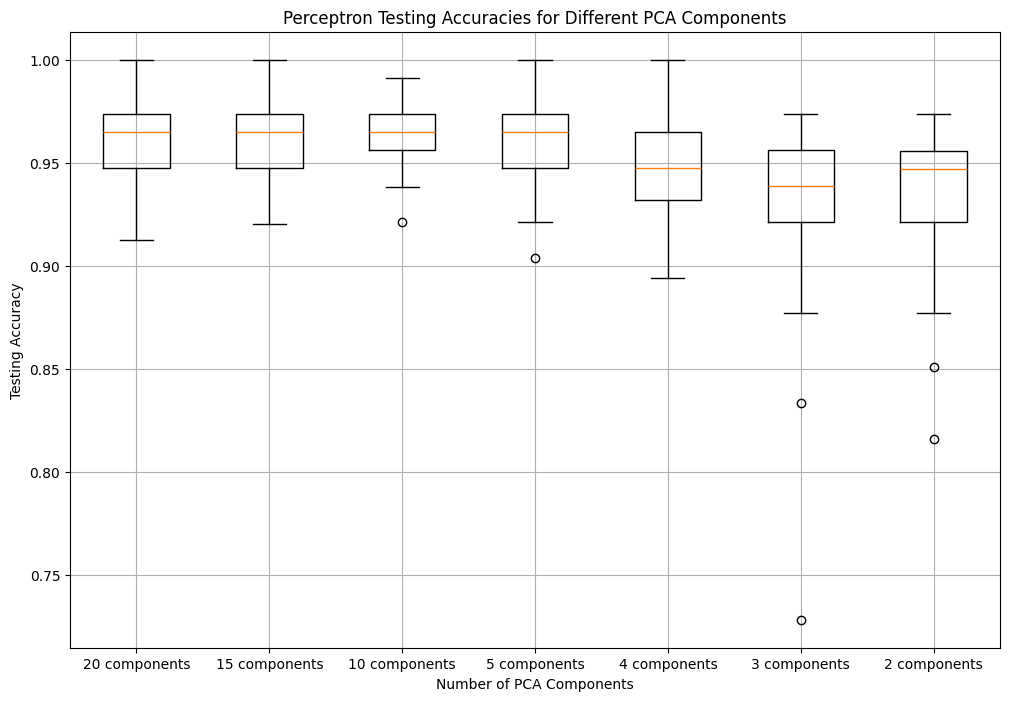

In [6]:
train_accuracy_values = [np.array(all_accuracies[comp]['train']) for comp in components]
test_accuracy_values = [np.array(all_accuracies[comp]['test']) for comp in components]

plt.figure(figsize=(12, 8))
plt.boxplot(train_accuracy_values, labels=[str(comp) + ' components' for comp in components])
plt.title('Perceptron Training Accuracies for Different PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Training Accuracy')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.boxplot(test_accuracy_values, labels=[str(comp) + ' components' for comp in components])
plt.title('Perceptron Testing Accuracies for Different PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.show()